In [1]:
!pip install konlpy
import pandas as pd
import numpy as np
from konlpy.tag import Okt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 62.4 MB/s 


In [2]:
import tensorflow as tf
tf.random.set_seed(777)
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from google.colab import files
myfile = files.upload()

Saving Culture.csv to Culture.csv
Saving Economy.csv to Economy.csv
Saving Global.csv to Global.csv
Saving politics.csv to politics.csv
Saving Region.csv to Region.csv
Saving Science.csv to Science.csv
Saving Society.csv to Society.csv
Saving Sports.csv to Sports.csv


In [15]:
df1 = pd.read_csv("/content/Culture.csv",  encoding = "CP949", engine='python')


In [16]:
df2 = pd.read_csv("/content/Economy.csv",  encoding = "CP949", engine='python')


In [17]:
df3 = pd.read_csv("/content/Global.csv",  encoding = "CP949", engine='python')


In [18]:
df4 = pd.read_csv("/content/politics.csv",  encoding = "CP949", engine='python')


In [19]:
df5 = pd.read_csv("/content/Region.csv",  encoding = "CP949", engine='python')


In [20]:
df6 = pd.read_csv("/content/Science.csv",  encoding = "CP949", engine='python')


In [21]:
df7 = pd.read_csv("/content/Society.csv",  encoding = "CP949", engine='python')


In [22]:
df8 = pd.read_csv("/content/Sports.csv",  encoding = "CP949", engine='python')

In [23]:
data_list = []
data_list.append(df1)
data_list.append(df2)
data_list.append(df3)
data_list.append(df4)
data_list.append(df5)
data_list.append(df6)
data_list.append(df7)
data_list.append(df8)

In [24]:
data=pd.DataFrame()
for i in data_list:
    data = pd.concat([data,i],ignore_index=True)

In [25]:
data.isnull().sum()

제목        0
통합 분류1    0
본문        0
dtype: int64

In [26]:
len(data[data.duplicated()])

7401

In [27]:
data=data.drop_duplicates(ignore_index = True)


In [28]:
data["본문"] = data["본문"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

In [29]:
data['통합 분류1']=data['통합 분류1'].str.split('>', expand=True).get(0)
data

,제목,통합 분류1,본문
0,"[종합] ‘연매살’ 주현영, 이서진 위해 거짓말→부녀 사이 들통",문화,연매살 이서진이 주현영이 딸이라고 고백했다 6일 방송된 tvN 월화드라마 연...
1,“중전은 극한직업”‘슈룹’의 김혜수가 표현해낸 ‘중전’ 캐릭터,문화,헤럴드경제 서병기 선임기자 국모는 개뿔 중전은 극한직업이다 엄마...
2,박희영 용산구청장 이태원 자택 불법 증축 참사 후 철거 [이태원 핼러윈 참사],사회,박희영 서울 용산구청장 측이 이태원동 자택을 불법 증축했다가 이태원 압사 참사 ...
3,[역지사지(歷知思志)] 신기전,국제,조선 세종 때 만들어진 신기전 神機箭 은 지금으로 치면 다연장 로켓 야전포에 가까운...
4,진한 커피와 옅은 잠 삶의 농도는?,문화,강원도립극단 창작극 카페인 신진연출가 공모 손기주 연출작불면증 소재 극사실주의 현...
...,...,...,...
23346,언더독의 반란,스포츠,카타르 월드컵이 조별경기를 마치고 어제부터 16강전에 돌입했다 조별리그 1차전에서...
23347,"오산G스포츠 이현이, 에디허테니스 女16세부 단식 패권",스포츠,이현이 15 오산G스포츠클럽 이현이 15 오산G스포츠클럽 가 세계적인 권위의 에디...
23348,[2022 FIFA 카타르월드컵] ‘향토 태극전사’ 한국 16강 견인차 브라질전도 ...,스포츠,도하의 기적 을 일궈낸 향토 고교 출신 태극전사 왼쪽부터 조규성 김진수 김민...
23349,"[2022 FIFA 카타르월드컵] '도하의 기적’ 이룬 벤투호, 최강 브라질 상대 ...",스포츠,2022 카타르 월드컵 엠블럼 12년 만에 원정 16강 진출의 목표를 이룬 한국 축...


In [30]:
okt = Okt() #okt사용

def okt_morphs(doc):
    tmp=okt.morphs(doc,stem=True)
    return tmp

def okt_nouns(doc):
    tmp=okt.nouns(doc)
    return tmp

def okt_pos(doc):
    tmp=[]
    for i,j in okt.pos(doc):
        if j in ['Noun','Adjective']:
            tmp.append(i)
    return tmp

In [31]:
data['본문정리morphs']=data['본문'].apply(okt_morphs)
data['본문정리nouns']=data['본문'].apply(okt_nouns)
data['본문정리pos']=data['본문'].apply(okt_pos)

In [32]:
categories=np.unique(data['통합 분류1']) #카테고리 안겹치게 한종류씩
categories

array(['IT_과학', '경제', '국제', '문화', '사회', '스포츠', '정치', '지역'], dtype=object)

In [33]:
category={}
for i in categories:
    category[i]=len(data[data['통합 분류1']==i])

In [34]:
category #카테고리별 데이터셋 수

{'IT_과학': 1374,
 '경제': 4482,
 '국제': 1088,
 '문화': 2244,
 '사회': 3762,
 '스포츠': 2282,
 '정치': 2231,
 '지역': 5888}

In [35]:
lcategories=list(categories)
def category(ct):
    return lcategories.index(ct)
data['숫자카테고리']=data['통합 분류1'].apply(category)
data['숫자카테고리']

0        3
1        3
2        4
3        2
4        3
        ..
23346    5
23347    5
23348    5
23349    5
23350    5
Name: 숫자카테고리, Length: 23351, dtype: int64

In [36]:
data=data.sample(frac=1).reset_index(drop=True)

In [37]:
data.head()

,제목,통합 분류1,본문,본문정리morphs,본문정리nouns,본문정리pos,숫자카테고리
0,"[속보] 한국 축구대표팀 벤투 감독 ""감독직 재계약 안 한다""",스포츠,아시아경제 서믿음 기자 한국 축구대표팀을 16강에 올린 파울루 벤투 대표팀 감독...,"[아시아, 경제, 서, 믿음, 기자, 한국, 축구, 대표팀, 을, 16, 강, 에,...","[아시아, 경제, 믿음, 기자, 한국, 축구, 대표팀, 강, 파울루, 투, 대표팀,...","[아시아, 경제, 믿음, 기자, 한국, 축구, 대표팀, 강, 파울루, 투, 대표팀,...",5
1,"산란계 농장 질병관리등급제 도입 ""방역에 치여 닭 기를 시간도 없다""",지역,조류 인플루엔자 AI 방역 정책을 개선하려 지난해 산란계 농장을 대상으로 질병관리...,"[조류, 인플루엔자, AI, 방역, 정책, 을, 개선, 하다, 지난해, 산란, 계,...","[조류, 인플루엔자, 방역, 정책, 개선, 지난해, 산란, 농장, 대상, 질병, 관...","[조류, 인플루엔자, 방역, 정책, 개선, 지난해, 산란, 농장, 대상, 질병, 관...",7
2,'마약'을 비타민이라 속여 50대女 성폭행한 60대 남성..징역 10년 선고,사회,기사와 관련 없는 자료 사진 사진 뉴스1 파이낸셜뉴스 지인에게 마약을 비타민...,"[기사, 와, 관련, 없다, 자료, 사진, 사진, 뉴스, 1, 파이낸셜뉴스, 지인,...","[기사, 관련, 자료, 사진, 사진, 뉴스, 파이낸셜뉴스, 지인, 마약, 비타민, ...","[기사, 관련, 없는, 자료, 사진, 사진, 뉴스, 파이낸셜뉴스, 지인, 마약, 비...",4
3,"경기도청 컬링팀 5G, 스투셀스 브랜트퍼트 닛산클래식 패권",스포츠,6일 캐나다 온토리오 브랜트퍼드에서 열린 2022 스투셀스 브랜트퍼트 닛산 클래식에...,"[6일, 캐나다, 온, 토리, 오, 브랜트퍼드, 에서, 열리다, 2022, 스투셀스...","[캐나다, 토리, 오, 브랜트퍼드, 스투셀스, 브랜트, 퍼트, 닛산, 클래식, 경기...","[캐나다, 토리, 오, 브랜트퍼드, 스투셀스, 브랜트, 퍼트, 닛산, 클래식, 우승...",5
4,[과학을읽다]합성생물학? '키메라' 아니고 게임체인저!,IT_과학,아시아경제 김봉수 기자 전염병 창궐과 자원 부족 환경 오염에 직면한 21세기 ...,"[아시아, 경제, 김봉수, 기자, 전염병, 창궐, 과, 자원, 부족, 환경, 오염,...","[아시아, 경제, 김봉수, 기자, 전염병, 창궐, 자원, 부족, 환경, 오염, 직면...","[아시아, 경제, 김봉수, 기자, 전염병, 창궐, 자원, 부족, 환경, 오염, 직면...",0


In [38]:
data.to_csv('okt.csv')

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['본문정리morphs'], data['숫자카테고리'], test_size=0.2, random_state=2021)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)


In [40]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train) #빈도수가 높은애로 인덱스 부여
len(tokenizer.word_index)

35388

In [41]:
tokenizer.word_index

{'하다': 1,
 '을': 2,
 '이': 3,
 '에': 4,
 '의': 5,
 '를': 6,
 '은': 7,
 '에서': 8,
 '가': 9,
 '는': 10,
 '한': 11,
 '으로': 12,
 '있다': 13,
 '과': 14,
 '로': 15,
 '되다': 16,
 '등': 17,
 '들': 18,
 '5일': 19,
 '6일': 20,
 '이다': 21,
 '와': 22,
 '한국': 23,
 '인': 24,
 '밝히다': 25,
 '전': 26,
 '하고': 27,
 '기자': 28,
 '것': 29,
 '1': 30,
 '적': 31,
 '돼다': 32,
 '도': 33,
 '고': 34,
 '지난': 35,
 '따르다': 36,
 '위': 37,
 '2': 38,
 '다': 39,
 '수': 40,
 '제': 41,
 '명': 42,
 '사업': 43,
 '지역': 44,
 '까지': 45,
 '날': 46,
 '부터': 47,
 '장': 48,
 '늘다': 49,
 '원': 50,
 '위해': 51,
 '가다': 52,
 '열리다': 53,
 '대': 54,
 '오다': 55,
 '서울': 56,
 '3': 57,
 '2022': 58,
 '및': 59,
 '시': 60,
 '받다': 61,
 '이번': 62,
 '개': 63,
 '16': 64,
 '4': 65,
 '대표': 66,
 '월드컵': 67,
 '진행': 68,
 '카타르': 69,
 '씨': 70,
 '성': 71,
 '대한': 72,
 '센터': 73,
 '정부': 74,
 '기업': 75,
 '시간': 76,
 '경제': 77,
 '회': 78,
 '축구': 79,
 '브라질': 80,
 '에게': 81,
 '않다': 82,
 '경기': 83,
 '대다': 84,
 '중': 85,
 '올해': 86,
 '대상': 87,
 '지': 88,
 '에는': 89,
 '보다': 90,
 '연': 91,
 '내년': 92,
 '위원회': 93,
 '산업': 94,
 '기': 95

In [42]:
threshold=2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 35388
등장 빈도가 1번 이하인 희귀 단어의 수: 12076
단어 집합에서 희귀 단어의 비율: 34.12456199841754
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1430496974837006


In [43]:
#빈도가 1회인 단어들은 중요하지않아서 제외
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 23314


In [44]:

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train) #빈도수가 높은애로 인덱스 부여



In [45]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_val_sequences = tokenizer.texts_to_sequences(x_val)
x_test_sequences = tokenizer.texts_to_sequences(x_test)


In [46]:
max_len = max(len(sequence) for sequence in x_train_sequences )
print(max_len) #시퀀스 최대길이


95


In [47]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
below_threshold_len(max_len, x_train_sequences)

전체 샘플 중 길이가 95 이하인 샘플의 비율: 100.0


In [48]:
x_train_pad=pad_sequences(x_train_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
x_val_pad=pad_sequences(x_val_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
x_test_pad=pad_sequences(x_test_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
#truncating='post', padding='post' 앞에꺼는 길이가 안맞을때 뒤에 0으로 채운다는거, 뒤에꺼는 넘어갈때 뒤에 자른다는거



In [49]:
y_train=tf.keras.utils.to_categorical(y_train)

y_val=tf.keras.utils.to_categorical(y_val)

y_test=tf.keras.utils.to_categorical(y_test)



In [50]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout

embedding_dim=128
hidden_units=128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(hidden_units))
model.add(Dropout(0.3))  
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [52]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
best=ModelCheckpoint('best_model', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history=model.fit(
    x_train_pad,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_pad, y_val), 
    callbacks=[early_stop,best]
    
)

Epoch 1/100
116/117 [============================>.] - ETA: 0s - loss: 1.9202 - accuracy: 0.2622
Epoch 1: val_loss improved from inf to 1.66973, saving model to best_model


117/117 [==============================] - 20s 109ms/step - loss: 1.9182 - accuracy: 0.2630 - val_loss: 1.6697 - val_accuracy: 0.3517
Epoch 2/100
115/117 [============================>.] - ETA: 0s - loss: 1.6121 - accuracy: 0.3776
Epoch 2: val_loss improved from 1.66973 to 1.45691, saving model to best_model


117/117 [==============================] - 6s 55ms/step - loss: 1.6088 - accuracy: 0.3788 - val_loss: 1.4569 - val_accuracy: 0.4414
Epoch 3/100
114/117 [============================>.] - ETA: 0s - loss: 1.3165 - accuracy: 0.4939
Epoch 3: val_loss improved from 1.45691 to 1.44024, saving model to best_model


117/117 [==============================] - 6s 53ms/step - loss: 1.3144 - accuracy: 0.4946 - val_loss: 1.4402 - val_accuracy: 0.4684
Epoch 4/100
113/117 [===========================>..] - ETA: 0s - loss: 1.1354 - accuracy: 0.5811
Epoch 4: val_loss improved from 1.44024 to 1.24748, saving model to best_model


117/117 [==============================] - 6s 54ms/step - loss: 1.1337 - accuracy: 0.5822 - val_loss: 1.2475 - val_accuracy: 0.5923
Epoch 5/100
115/117 [============================>.] - ETA: 0s - loss: 0.9709 - accuracy: 0.6597
Epoch 5: val_loss improved from 1.24748 to 1.17739, saving model to best_model


117/117 [==============================] - 6s 54ms/step - loss: 0.9703 - accuracy: 0.6601 - val_loss: 1.1774 - val_accuracy: 0.6362
Epoch 6/100
114/117 [============================>.] - ETA: 0s - loss: 0.7512 - accuracy: 0.7607
Epoch 6: val_loss improved from 1.17739 to 1.10976, saving model to best_model


117/117 [==============================] - 6s 54ms/step - loss: 0.7533 - accuracy: 0.7606 - val_loss: 1.1098 - val_accuracy: 0.6646
Epoch 7/100
113/117 [===========================>..] - ETA: 0s - loss: 0.6397 - accuracy: 0.8040
Epoch 7: val_loss improved from 1.10976 to 1.10955, saving model to best_model


117/117 [==============================] - 6s 55ms/step - loss: 0.6400 - accuracy: 0.8034 - val_loss: 1.1096 - val_accuracy: 0.6539
Epoch 8/100
117/117 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.8293
Epoch 8: val_loss did not improve from 1.10955
117/117 [==============================] - 2s 14ms/step - loss: 0.5792 - accuracy: 0.8293 - val_loss: 1.1511 - val_accuracy: 0.6761
Epoch 9/100
117/117 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.8675
Epoch 9: val_loss did not improve from 1.10955
117/117 [==============================] - 2s 13ms/step - loss: 0.4857 - accuracy: 0.8675 - val_loss: 1.1230 - val_accuracy: 0.6772
Epoch 10/100
116/117 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.9017
Epoch 10: val_loss improved from 1.10955 to 1.07937, saving model to best_model


117/117 [==============================] - 6s 54ms/step - loss: 0.3703 - accuracy: 0.9020 - val_loss: 1.0794 - val_accuracy: 0.7141
Epoch 11/100
115/117 [============================>.] - ETA: 0s - loss: 0.3555 - accuracy: 0.9092
Epoch 11: val_loss did not improve from 1.07937
117/117 [==============================] - 2s 14ms/step - loss: 0.3560 - accuracy: 0.9091 - val_loss: 1.1387 - val_accuracy: 0.7099
Epoch 12/100
113/117 [===========================>..] - ETA: 0s - loss: 0.3329 - accuracy: 0.9145
Epoch 12: val_loss did not improve from 1.07937
117/117 [==============================] - 2s 13ms/step - loss: 0.3330 - accuracy: 0.9139 - val_loss: 1.2069 - val_accuracy: 0.6975
Epoch 13/100
116/117 [============================>.] - ETA: 0s - loss: 0.2737 - accuracy: 0.9314
Epoch 13: val_loss did not improve from 1.07937
117/117 [==============================] - 2s 13ms/step - loss: 0.2726 - accuracy: 0.9317 - val_loss: 1.2452 - val_accuracy: 0.7133
Epoch 14/100
114/117 [============

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 95, 128)           2984192   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
Total params: 3,116,808
Trainable params: 3,116,808
Non-trainable params: 0
_________________________________________________________________


In [63]:
from tensorflow.keras.models import load_model
model.save('best_model')
loaded_model = load_model('best_model')
print('\n테스트 정확도 : %.4f'%(loaded_model.evaluate(x_test_pad,y_test)[1]))

146/146 [==============================] - 1s 6ms/step - loss: 1.2447 - accuracy: 0.7253

테스트 정확도 : 0.7253


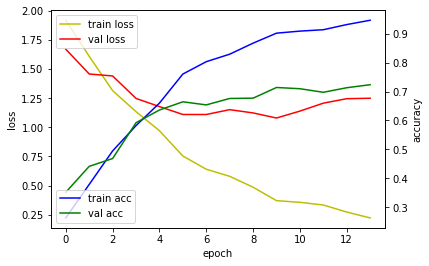

In [64]:
import matplotlib.pyplot as plt

fig, loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(history.history['loss'],'y',label='train loss')
loss_ax.plot(history.history['val_loss'],'r',label='val loss')

acc_ax.plot(history.history['accuracy'],'b',label='train acc')
acc_ax.plot(history.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()